# Convolutions

In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io
from skimage.color import rgb2gray
from skimage.transform import resize

## 0. Original Input Image <a name="orig"></a>

<function skimage.io._io.imshow(arr, plugin=None, **plugin_args)>

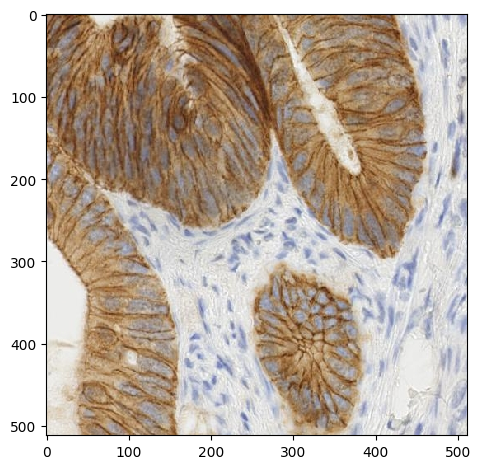

In [3]:
original = data.immunohistochemistry()
io.imshow(data.immunohistochemistry())
io.imshow


(64, 64)


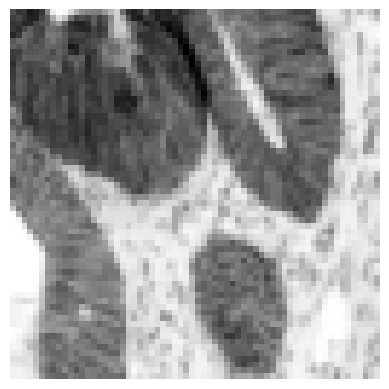

In [4]:
im = rgb2gray(data.immunohistochemistry())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

## Horizontal Edge Filter <a name="hor"></a>

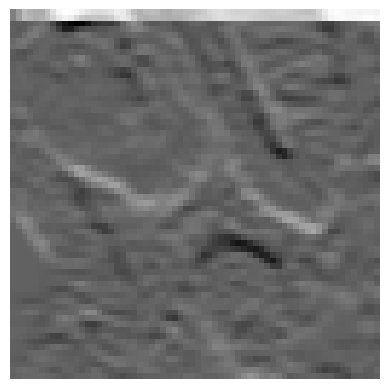

In [5]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter <a name="ver"></a>

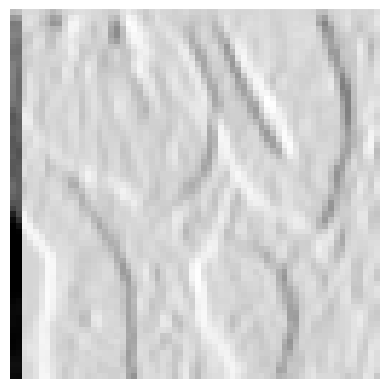

In [6]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Horizontal Edge Filter with Stride 2 <a name="hor2"></a>

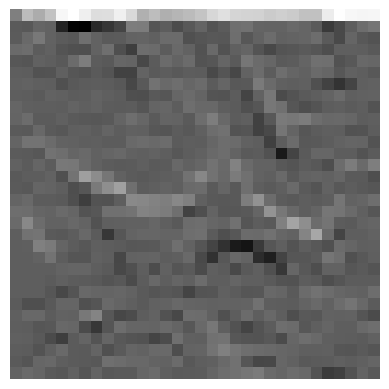

In [7]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

## Vertical Edge Filter with Stride 2 <a name="ver2"></a>

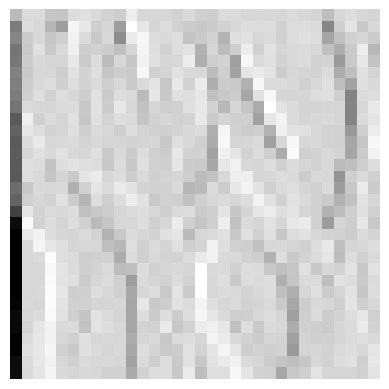

In [8]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

# Converting grayscale to binary (black and white) image

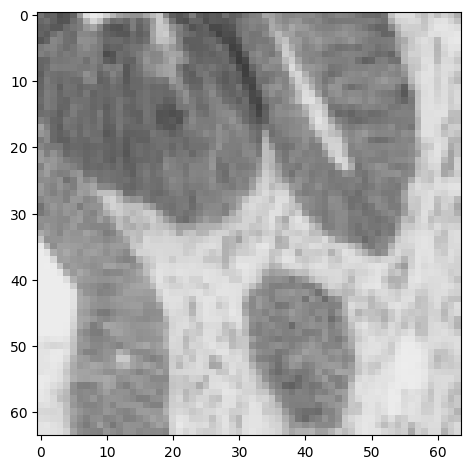

In [9]:
io.imshow(im)
io.show()

In [10]:
print("Value of gray image")
print("data type object", im.dtype)
im[0:5,0:5]

Value of gray image
data type object float64


array([[0.45026179, 0.3796726 , 0.38723646, 0.30801281, 0.33161569],
       [0.40872058, 0.43778121, 0.38287959, 0.32691437, 0.33286308],
       [0.38492421, 0.39570823, 0.34832147, 0.3479849 , 0.42273184],
       [0.39166125, 0.36132182, 0.44010901, 0.49654129, 0.44068696],
       [0.34372387, 0.39082639, 0.53095294, 0.50600371, 0.43934584]])

# Thresholding

Thresholding is the simplest method of image segmentation to convert grayscale to binary image. The gray pixel value is between 0-255. Then, the threshold value should be between 0-255 as well. In the beginning, we can use the value 128 as the threshold value, this is because this value is midway between gray value.

data type object float64


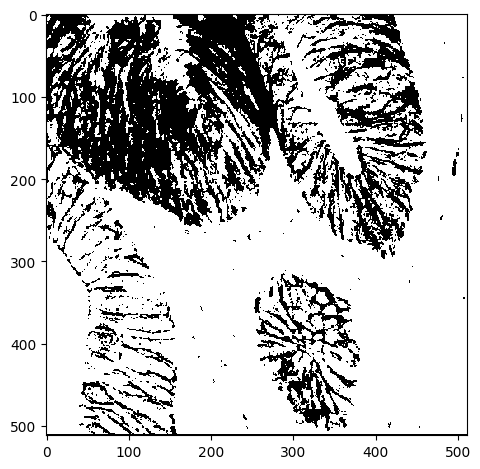

In [11]:
from skimage import data, io
import numpy as np

image = data.immunohistochemistry()
gray_image = rgb2gray(image)
binary_image = np.zeros((image.shape[0],image.shape[1]), dtype='float64')


#Threshold value
# We divided the threshold value with ```255.0``` 
#because the pixel values store in the gray_image is normalized into ```0-1```
thresh = 128/255.0

for row in range(0,(image.shape[0]-1)):
    for col in range(0,(image.shape[1]-1)):
        if(gray_image[row, col] > thresh):
            binary_image[row, col] = 1
        else:
            binary_image[row, col] = 0

print("data type object", gray_image.dtype)

io.imshow(binary_image)
io.show()

Threshold value 0.5019607843137255


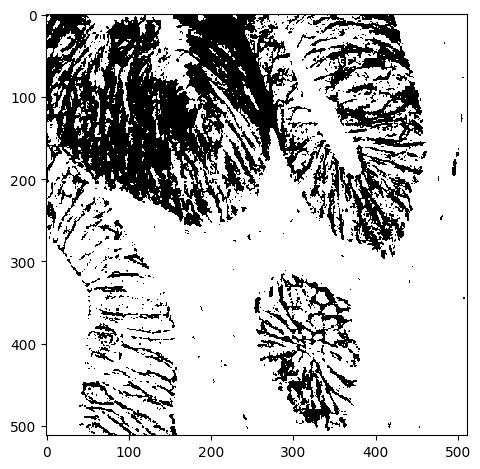

In [12]:
#Threshold value
# We divided the threshold value with ```255.0``` 
#because the pixel values store in the gray_image is normalized into ```0-1```
thresh = 128/255.0

binary_image = gray_image >= thresh

print("Threshold value", thresh)
io.imshow(binary_image)
io.show()

In [13]:
binary_image[200:205,0:5]

array([[False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

Threshold value 0.39


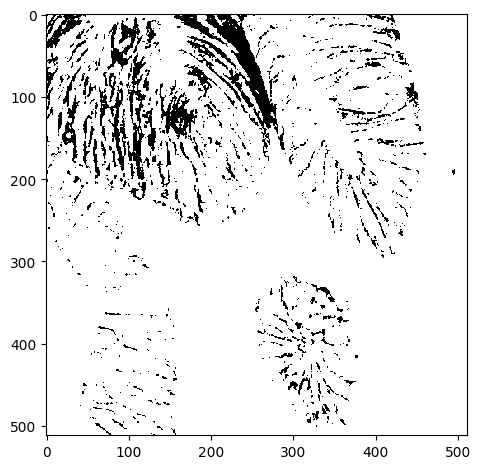

In [14]:
# we can try another threshold value
thresh = 0.39

binary_image = gray_image >= thresh

print("Threshold value", thresh)
io.imshow(binary_image)
io.show()

Threshold value 0.7


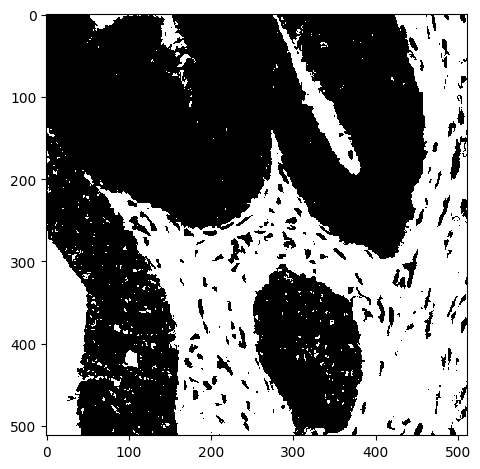

In [15]:
# we can try another threshold value
thresh = 0.7

binary_image = gray_image >= thresh

print("Threshold value", thresh)
io.imshow(binary_image)
io.show()

In [16]:
binary_image[200:205,0:5]


array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

# Colour Convolution

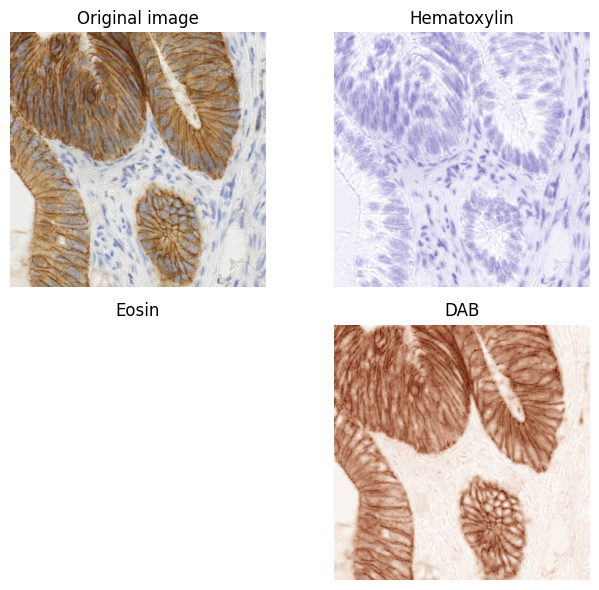

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = data.immunohistochemistry()

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Now we can easily manipulate the hematoxylin and DAB channels:



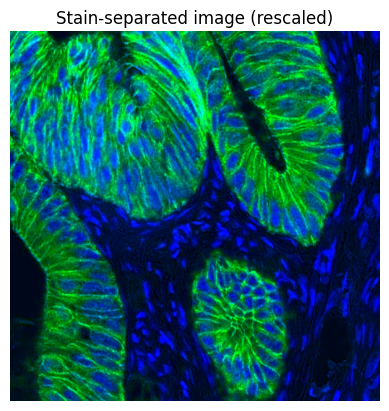

In [19]:
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))

# Cast the two channels into an RGB image, as the blue and green channels
# respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title('Stain-separated image (rescaled)')
axis.axis('off')
plt.show()

Tutorial from: https://github.com/mrolarik/basic-image-processing-tutorial/blob/master/converting-grayscale-to-binary-image.ipynb

Notes:
skimage.data
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py